In [1]:
# Importing all pakages that necessary.

# loading pandas and numpy for data cleaning and exploratory anaysis.

import pandas as pd
from pandas import DataFrame
import numpy as np

# Defining the dataset's new name in this project.
path = '/home/anurag/ML/BIG_MART/Train_UWu5bXk.csv'
data = pd.read_csv(path)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
# make copy to avoid changing original data when imputing.

copy_data = data.copy()
#copy_data.isnull().any()

# Data Cleaning

In [3]:
# Firstly, we should have a look whether the data is completed or not.
# Because the missing value will have an adverse impact on the building of regression model.

null_values_col = copy_data.isnull().sum()
null_values_col = null_values_col[null_values_col != 0].sort_values(ascending = False).reset_index()
null_values_col.columns = ["variable", "number of missing"]
null_values_col.head()

,variable,number of missing
0,Outlet_Size,2410
1,Item_Weight,1463


In [4]:
# using median value of each column to fill the N/A values, because it will not be influened by outliers.

def fillWithMedian(data):
    return data.fillna(data.median(), inplace=True)

def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col
#df=df.apply(lambda col:fillna(col))


fillWithMedian(copy_data)
col = copy_data['Outlet_Size']
copy_data = copy_data.apply(lambda col : fillna(col))

In [5]:
copy_data.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

# Exploratory Analysis

In [6]:
# read the data

copy_data.head(10)
#len(copy_data)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [7]:
(copy_data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Descriptive Statistics

In [8]:
copy_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


Text(0, 0.5, 'Frequency')

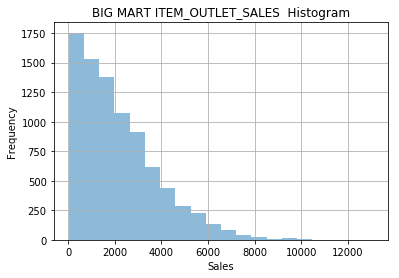

In [9]:
# Matplotlib package for visualisation.

import matplotlib.pyplot as plt
%matplotlib inline

copy_data.Item_Outlet_Sales.hist(bins=20, alpha=0.5)
plt.title("BIG MART ITEM_OUTLET_SALES  Histogram")
plt.xlabel("Sales")
plt.ylabel("Frequency")

# Statistical Inference


In [10]:
inf_data = pd.read_csv(path,usecols=[0,11])
inf_data.head(10)

,Item_Identifier,Item_Outlet_Sales
0,FDA15,3735.1380
1,DRC01,443.4228
2,FDN15,2097.2700
3,FDX07,732.3800
4,NCD19,994.7052
5,FDP36,556.6088
6,FDO10,343.5528
7,FDP10,4022.7636
8,FDH17,1076.5986
9,FDU28,4710.5350


In [11]:
low_fat = inf_data[inf_data['Item_Identifier'] == 'FDA15']
print(low_fat)
non_low_fat = inf_data[inf_data['Item_Identifier'] != 'FDA15']
#print(non_low_fat)
l_data = low_fat[['Item_Outlet_Sales']] 
#print(l_data)
nl_data = non_low_fat[['Item_Outlet_Sales']]

     Item_Identifier  Item_Outlet_Sales
0              FDA15          3735.1380
831            FDA15          5976.2208
2599           FDA15          6474.2392
2643           FDA15          5976.2208
4874           FDA15           498.0184
5413           FDA15          6474.2392
6696           FDA15          6474.2392
7543           FDA15          5976.2208


In [12]:
u_mean = low_fat.mean()
n_mean = non_low_fat.mean()
u_stdev = low_fat.std()
n_stdev = non_low_fat.std()
u_count = low_fat.count()
#print(u_count)
n_count = non_low_fat.count()
degree_of_freedom = u_count + n_count - 2
#print(degree_of_freedom)
#type(low_fat['Item_Outlet_Sales'][0])

In [13]:
standard_error = (u_stdev**2/u_count + n_stdev**2/n_count)**0.5
#print("Serror: " , standard_error)
t_statistics = (u_mean - n_mean)/standard_error
print('the t-statistics is: {}'.format(t_statistics))
print('the degree of freedom is: {}'.format(degree_of_freedom))

the t-statistics is: Item_Identifier           NaN
Item_Outlet_Sales    4.061627
dtype: float64
the degree of freedom is: Item_Identifier      8521
Item_Outlet_Sales    8521
dtype: int64


# Probability Distribution

In [14]:
# Bayes Theorem

low_fat = low_fat['Item_Outlet_Sales'].values.tolist()
non_low_fat = non_low_fat['Item_Outlet_Sales'].values.tolist()

low_fat_count = low_fat['Item_Outlet_Sales'].count()
non_low_fat_count = non_low_fat['Item_Outlet_Sales'].count()

low_fat_5k_count = 0
non_low_fat_5k_count = 0

for i in low_fat:
    if i > 5000:
        low_fat_5k_count += 1

for i in non_low_fat:
    if i > 5000:
       non_low_fat_5k_count += 1

# P(a|b) = (P(b|a))*P(a)/P(b)

probability = (low_fat_5k_count/(low_fat_5k_count+non_low_fat_5k_count)) * ((low_fat_5k_count + non_low_fat_5k_count)/
               (low_fat_count + non_low_fat_count)) / (low_fat_count/(low_fat_count + non_low_fat_count))
print(probability) 

TypeError: list indices must be integers or slices, not str

# Pearson's R-Square Correlation

In order to choose features that are correlated to our target variables, the Pearson's R-Square Correlation can be applied to choose top 8 features that are most correlated to the salaries.

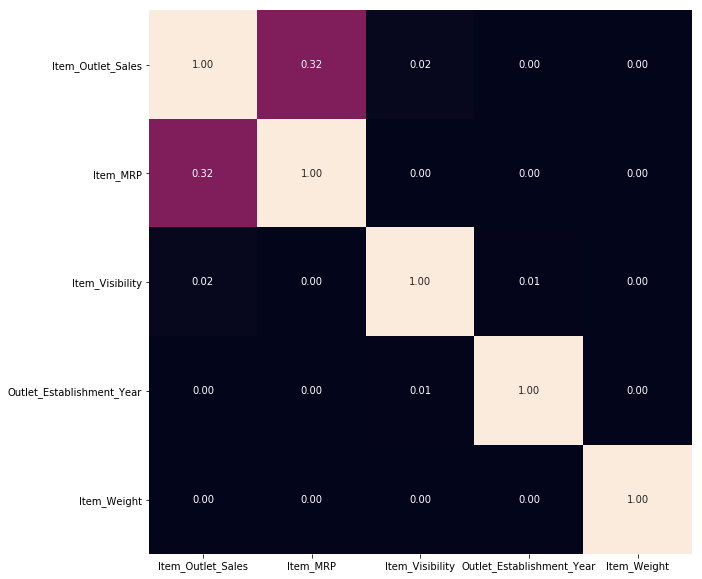

In [15]:
import seaborn as sns
'''
pandas.DataFrame.corr
method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation

min_periods : int, optional
Minimum number of observations required per pair of columns to have a valid result. Currently only available for pearson and spearman correlation
'''

df = copy_data.copy()
corrmat = df.corr(method='pearson', min_periods=1)
r_square = corrmat ** 2

## Top 5 correlated variables
k = 6 #number of variables for heatmap
cols = r_square.nlargest(k, 'Item_Outlet_Sales')['Item_Outlet_Sales'].index
cm = df[cols].corr()
cm_square = cm ** 2
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:
cm_square.columns

Index(['Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility',
       'Outlet_Establishment_Year', 'Item_Weight'],
      dtype='object')

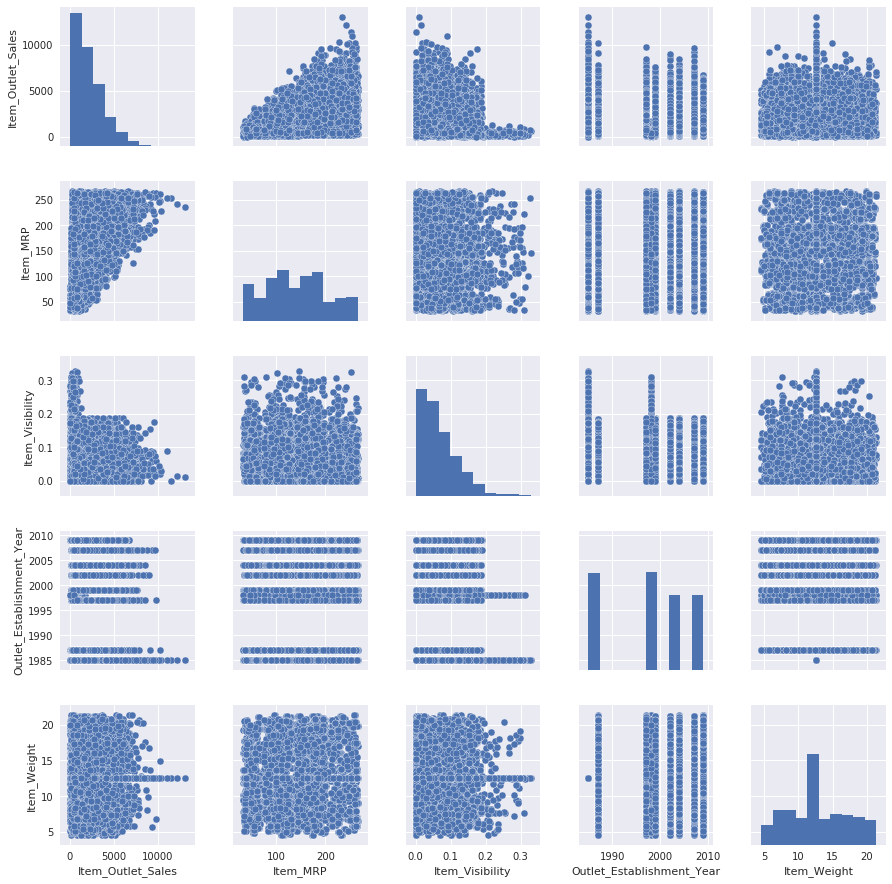

In [17]:
# Using scatter plots to detect the correlation value

variables = ['Item_Outlet_Sales' , 'Item_MRP', 'Item_Visibility' , 'Outlet_Establishment_Year', 'Item_Weight']

sns.set()
sns.pairplot(df[variables], size = 2.5)
plt.show()

#  Multicollinearity Analysis

In [18]:
x = df[['Item_Outlet_Sales' , 'Item_MRP', 'Item_Visibility' , 'Outlet_Establishment_Year', 'Item_Weight']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,4.0,Item_Outlet_Sales
1,9.1,Item_MRP
2,2.7,Item_Visibility
3,16.8,Outlet_Establishment_Year
4,10.2,Item_Weight


In [19]:
x = df[['Item_Outlet_Sales' , 'Item_MRP', 'Item_Visibility' , 'Item_Weight']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,4.0,Item_Outlet_Sales
1,7.6,Item_MRP
2,2.4,Item_Visibility
3,4.7,Item_Weight


# Regression

(1) Measure of Goodness: RMSE

Root Mean Squrare Error is a measure of how far the predicted points away from the real points. Compared with MSE and MAE, RMSE can provide the same dimensionality with target variables, and the sqaure function can make the measurement more precise than MAE when comparing different models.

In [20]:
from sklearn.metrics import mean_squared_error

# RMSE for testing data

def rmse_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    return(rmse)

(2) Selection of Model: Multivariate, Cross Validation, and Bias/Variance Trade-off

At first, we use multivariate linear regression to build our initial model. Then we assume that our model does not cause overfitting or underfitting. In order to accept or reject our hypothesis, we use cross validation to separate our data into training set and validation set (8:2). Then we apply the bias/variance trade-off graph to see whether the assumption is true or not.

In [67]:
from sklearn.model_selection import train_test_split

x = df[['Item_MRP', 'Item_Visibility' ,  'Item_Weight']]
y = df[['Item_Outlet_Sales']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
#x_model= x
#y_model =y

In [68]:
#test_data = pd.read_csv('/home/anurag/ML/BIG_MART/Test_u94Q5KV.csv' )
#test_data.head()
#len(test_data)

In [66]:
'''# using median value of each column to fill the N/A values, because it will not be influened by outliers.

def fillWithMedian(data):
    return data.fillna(data.median(), inplace=True)

def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col
#df=df.apply(lambda col:fillna(col))


fillWithMedian(test_data)
col = test_data['Outlet_Size']
test_data = test_data.apply(lambda col : fillna(col))'''

"# using median value of each column to fill the N/A values, because it will not be influened by outliers.\n\ndef fillWithMedian(data):\n    return data.fillna(data.median(), inplace=True)\n\ndef fillna(col):\n    col.fillna(col.value_counts().index[0], inplace=True)\n    return col\n#df=df.apply(lambda col:fillna(col))\n\n\nfillWithMedian(test_data)\ncol = test_data['Outlet_Size']\ntest_data = test_data.apply(lambda col : fillna(col))"

In [65]:
#copy_data.isnull().any()
#test_data.head()

In [64]:
#x_test = test_data[['Item_MRP', 'Item_Visibility' ,  'Item_Weight']]
#y_test = test_data[['Item_Outlet_Sales']]

In [40]:
# Cross Validation

# Spliting dataset into three parts, for training, validation, and testing respectively.

x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.25, random_state=1)

In [41]:
print("the number of data for training:")
print(y_train.count())
print("the number of data for validation:")
print(y_val.count())
print("the number of data for testing:")
print(y_test.count())

the number of data for training:
Item_Outlet_Sales    5113
dtype: int64
the number of data for validation:
Item_Outlet_Sales    1705
dtype: int64
the number of data for testing:
Item_Outlet_Sales    1705
dtype: int64


In [42]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

print(rmse_model(linear_regression, x_test, y_test))
print(linear_regression.coef_)
print(linear_regression.intercept_)

1395.4807749125937
[[ 1.56437951e+01 -4.13793100e+03  1.05664392e+00]]
[237.81978551]


degree = 1, training RMSE = 1398.78, validation RMSE = 1347.08
degree = 2, training RMSE = 1385.18, validation RMSE = 1332.21
degree = 3, training RMSE = 1382.56, validation RMSE = 1330.89
degree = 4, training RMSE = 1378.02, validation RMSE = 1331.33
degree = 5, training RMSE = 1378.49, validation RMSE = 1340.65
degree = 6, training RMSE = 1385.73, validation RMSE = 1354.14
degree = 7, training RMSE = 1372.58, validation RMSE = 1343.00


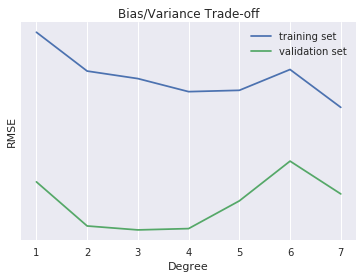

In [43]:
# Bias-Variance Trade-off

from sklearn.preprocessing import PolynomialFeatures

train_rmses = []
val_rmses = []
degrees = range(1,8)

for i in degrees:
    
    poly = PolynomialFeatures(degree=i, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)

    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y_train)
    
    # training RMSE
    y_train_pred = poly_reg.predict(x_train_poly)
    train_poly_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    train_rmses.append(train_poly_rmse)
    
    # validation RMSE
    x_val_poly = poly.fit_transform(x_val)
    y_val_pred = poly_reg.predict(x_val_poly)
    
    val_poly_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_rmses.append(val_poly_rmse)

    print('degree = %s, training RMSE = %.2f, validation RMSE = %.2f' % (i, train_poly_rmse, val_poly_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, train_rmses,label= 'training set')
ax.plot(degrees, val_rmses,label= 'validation set')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.set_title('Bias/Variance Trade-off')  
plt.legend()
plt.show()

In [44]:
# RMSE for testing data

second_poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = second_poly.fit_transform(x_train)

second_reg = LinearRegression()
second_reg.fit(x_train_poly, y_train)

x_test_second_poly = second_poly.fit_transform(x_test)
y_test_pred = second_reg.predict(x_test_second_poly)

print(rmse_model(second_reg, x_test_second_poly, y_test))
print(second_reg.coef_)
print(second_reg.intercept_)

1378.8959948751133
[[ 1.67422682e+01  5.55366924e+03  1.14390270e+02 -9.55830477e-04
  -3.74837261e+01  1.28743968e-01 -2.96753165e+04  9.12044921e+01
  -5.25172004e+00]]
[-783.96467629]


(3) Regularization: Ridge, Lasso, and ElasticNet

There are 3 ways to solve overfiting. The first way is to increase the size of dataset, the second way is to choose a suitable model complexity, and the third way is to use regularization to reduce the value of coefficient. In this part, we focus on regularization and select degree=4 to test the effectiveness of these three methods.

The meaning of regularization can be considered as 'punishiment'. When the model is too complex, the values of coefficients are very large. So we introduce the l to make the coefficients smaller than before.

In [45]:
# At first, we calculate the RMSE before regularization.

poly = PolynomialFeatures(degree=4, include_bias=False)
x_train_poly = poly.fit_transform(x_train)

poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)

x_test_poly = poly.fit_transform(x_test)
y_test_pred = poly_reg.predict(x_test_poly)

print(rmse_model(poly_reg, x_test_poly, y_test))

1378.2139661857952


# Ridge

[1331.5260114372968, 1331.5024701749894, 1331.5781591031318, 1331.7373293330143, 1331.9531522415357, 1332.088730165547, 1332.1853036453042, 1332.2595083124472, 1332.3906446463232, 1332.478709881782]


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.249207e-22
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.224851e-22
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.246033e-22
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.075759e-2

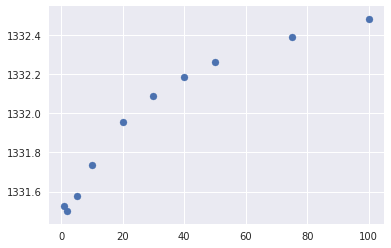

In [46]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

rmse=[]
alpha=[1, 2, 5, 10, 20, 30, 40, 50, 75, 100]

for a in alpha:
    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.176466e-21
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.366866e-21
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.577342e-21
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.787467e-2

[1331.9531522415357, 1331.9847819061338, 1332.0138289491094, 1332.040649743614, 1332.0655364519826, 1332.088730165547, 1332.1104313033475, 1332.1308077475292, 1332.1500011923363, 1332.1681321088763, 1332.1853036453042, 1332.2016047084935, 1332.21711241456, 1332.2318940510017, 1332.246008658128, 1332.2595083124472, 1332.272439174944, 1332.2848423526773, 1332.2967546115287, 1332.3082089689435]


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.945583e-21
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.156539e-21
  overwrite_a=True).T


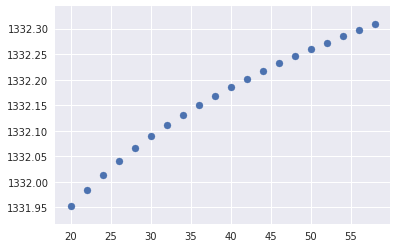

In [47]:
# Adjust alpha based on previous result

alpha=np.arange(20, 60, 2)
rmse=[]

for a in alpha:
    #ridge=Ridge(alpha=a, copy_X=True, fit_intercept=True)
    #ridge.fit(x_train, y_train)
    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.176466e-21
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.198616e-21
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.220771e-21
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.242931e-2

[1331.9531522415357, 1331.9564431607707, 1331.9597044446534, 1331.9629365599274, 1331.9661399637891, 1331.969315104188, 1331.972462419971, 1331.9755823410856, 1331.978675288757, 1331.9817416756548, 1331.9847819061338, 1331.9877963763897, 1331.9907854745727, 1331.993749581116, 1331.9966890687083, 1331.9996043026158, 1332.002495640812, 1332.005363434095, 1332.008208026353, 1332.0110297545807, 1332.013828949108, 1332.0166059337942, 1332.0193610260756, 1332.0220945372205, 1332.0248067723742, 1332.0274980307477, 1332.030168605714, 1332.032818785008, 1332.0354488508033, 1332.038059079865, 1332.0406497436138, 1332.0432211083357, 1332.0457734352276, 1332.0483069805632, 1332.05082199577, 1332.0533187275125, 1332.0557974179567, 1332.0582583045905, 1332.0607016206159, 1332.0631275948715, 1332.0655364519823, 1332.0679284124612, 1332.0703036927557, 1332.0726625054099, 1332.0750050591503, 1332.077331558846, 1332.0796422057333, 1332.081937197462, 1332.0842167281228, 1332.0864809884085]


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.018668e-21
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.039690e-21
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.060712e-21
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.081734e-2

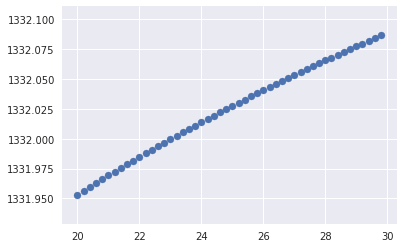

In [48]:
# Adjust alpha based on previous result

alpha=np.arange(20, 30, 0.2)
rmse=[]

for a in alpha:
    #ridge=Ridge(alpha=a, copy_X=True, fit_intercept=True)
    #ridge.fit(x_train, y_train)
    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

In [49]:
# Use alpha=40.4 to predict the test data

ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=24.6))
ridge_model = ridge.fit(x_train, y_train)

predictions = ridge_model.predict(x_test)
print("Ridge RMSE is: " + str(rmse_model(ridge_model, x_test, y_test)))

Ridge RMSE is: 1377.0293718548587


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.640374e-21
  overwrite_a=True).T


# Lasso 

/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

[1330.855216460561, 1331.672057986019, 1331.6507542692443, 1331.8561642626742, 1331.9544757272254]


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


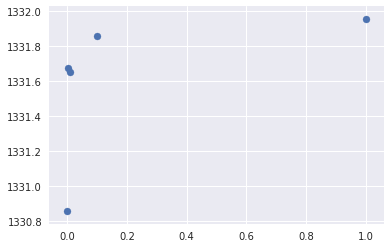

In [50]:
from sklearn.linear_model import Lasso

rmse=[]
alpha=[0.0001, 0.001, 0.01, 0.1, 1]

for a in alpha:
    lasso=make_pipeline(PolynomialFeatures(4), Lasso(alpha=a))
    lasso.fit(x_train, y_train)
    predict=lasso.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

In [51]:
lasso = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.0001))
lasso_model = lasso.fit(x_train, y_train)
predictions = lasso_model.predict(x_test)
print("RMSE in Testing : " + str(rmse_model(lasso_model, x_test, y_test)))

RMSE in Testing : 1377.6498240223132


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# ElasticNet

/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

[1331.7157878226453, 1331.799375642416, 1332.0076288882797, 1331.8882615178425, 1331.8779705040895, 1332.0730754368722]


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


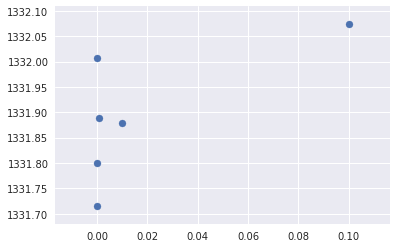

In [52]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

rmse=[]
alpha=[0.000001, 0.00001, 0.0001, 0.001,0.01,0.1]

for a in alpha:
    elasticnet=make_pipeline(PolynomialFeatures(4), ElasticNet(alpha=a))
    elasticnet.fit(x_train, y_train)
    predict=elasticnet.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
                             
print(rmse)
plt.scatter(alpha, rmse)

In [69]:
test_data = pd.read_csv('/home/anurag/ML/BIG_MART/Test_u94Q5KV.csv' )
test_data.head()
len(test_data)

5681

In [70]:
# using median value of each column to fill the N/A values, because it will not be influened by outliers.

def fillWithMedian(data):
    return data.fillna(data.median(), inplace=True)

def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col
#df=df.apply(lambda col:fillna(col))


fillWithMedian(test_data)
col = test_data['Outlet_Size']
test_data = test_data.apply(lambda col : fillna(col))

In [73]:
copy_data.isnull().any()
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [79]:
x_test1 = test_data[['Item_MRP', 'Item_Visibility' ,  'Item_Weight']]
len(x_test1)

5681

In [80]:
predict_test=elasticnet.predict(x_test1)
print(len(predict_test))

5681


In [82]:
import numpy as np
np.savetxt("solution.csv", predict_test, delimiter=",", fmt='%s')
